The idea is to take two imgs: RGB and Grayscale(that represents IR) and combine them into one. 
Draw a bb on the creted 4 canal image(how?).
Then split them back and receive RGB with the correct bb and grayscale with the correct bb


offset_x: 580
offset_y: 544
RGB: (1600, 1800, 3)
IR: (512, 640, 3)


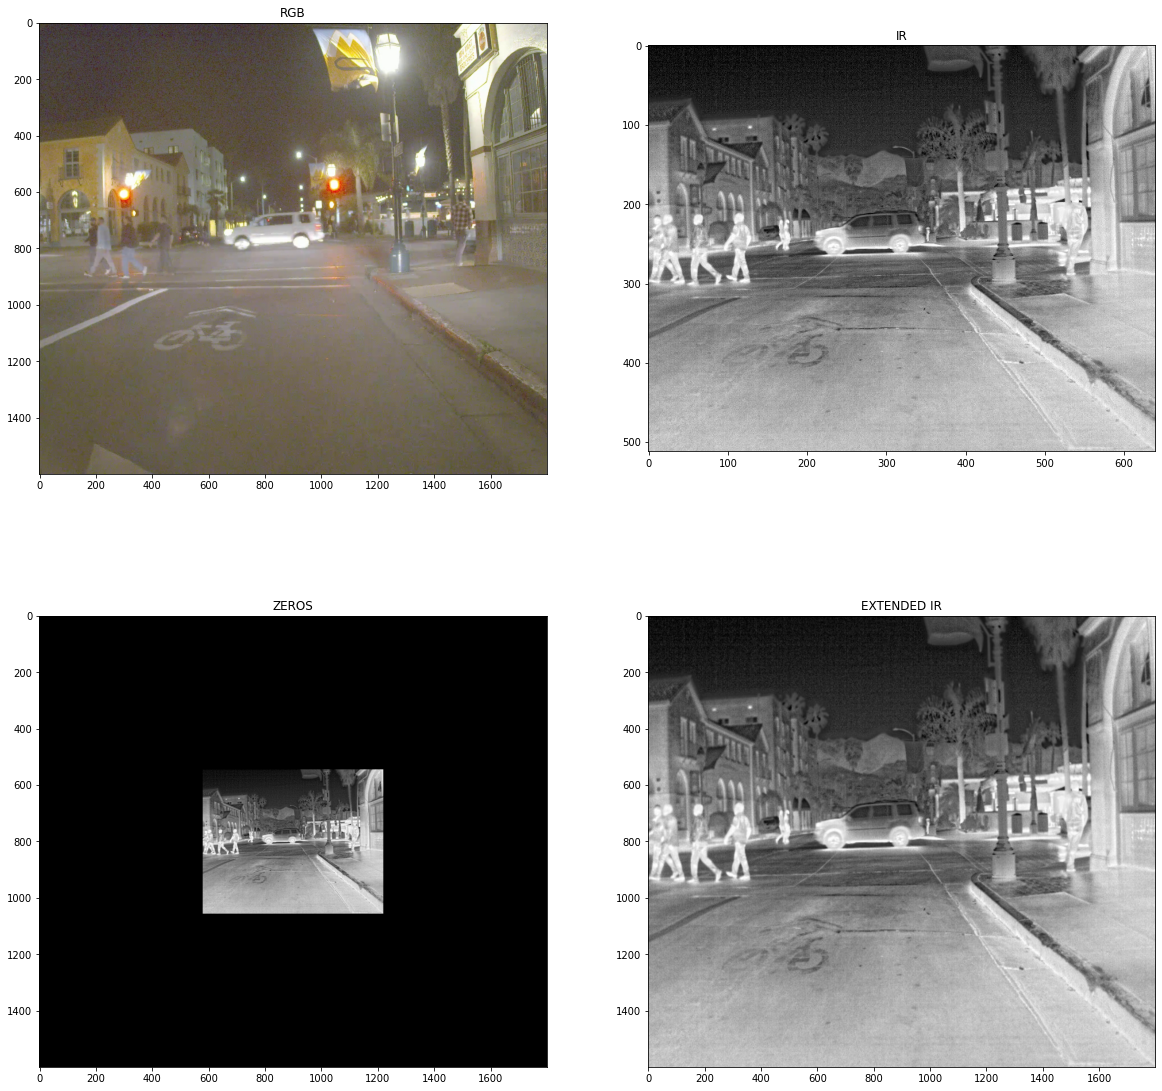

In [1]:
%matplotlib inline 
import cv2
import numpy as np
import matplotlib.pyplot as plt

path_rgb = "data/RGB/FLIR_08876.jpg"
path_ir = "data/thermal_8_bit/FLIR_08876.jpeg"
img_bgr = cv2.imread(path_rgb)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_ir = cv2.imread(path_ir)

zeros = np.zeros(img_rgb.shape, dtype=np.uint8)

offset_x = (img_rgb.shape[1] - img_ir.shape[1]) // 2
offset_y = (img_rgb.shape[0] - img_ir.shape[0]) // 2

print("offset_x: {}".format(offset_x))
print("offset_y: {}".format(offset_y))

print("RGB: {}".format(img_rgb.shape))
print("IR: {}".format(img_ir.shape))

zeros[offset_y:offset_y + img_ir.shape[0], offset_x:offset_x + img_ir.shape[1]] = img_ir
extended_ir = cv2.resize(img_ir, (img_rgb.shape[1], img_rgb.shape[0]))

# img_ir = cv2.imread(path_ir)
if img_rgb is not None and img_ir is not None:
    f, axarr = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
    axarr[0, 0].imshow(img_rgb)
    axarr[0, 1].imshow(img_ir)
    axarr[0, 0].set_title("RGB")
    axarr[0, 1].set_title("IR")
#     axarr[0, 0].axis("off")
#     axarr[0, 1].axis("off")
    axarr[1, 0].imshow(zeros)
    axarr[1, 1].imshow(extended_ir)
    axarr[1, 0].set_title("ZEROS")
    axarr[1, 1].set_title("EXTENDED IR")
#     axarr[1, 0].axis("off")
#     axarr[1, 1].axis("off")
    
    plt.show()
    